# SF crime dataset ranges from Jan, 2003 to May, 2015

Focus on time analysis in this notebook. The dataset covers crime records in San Francisco from 2013-01-06 to 2015-05-13. 
<br>
<br>
Examine patterns of crimes over years
<br>
Examine seasonal/monthly patterns of crimes 
<br>
Examine hourly patterns 
<br>
Example weekly patterns
<br>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from matplotlib.colors import rgb2hex

In [2]:
train = pd.read_csv('train.csv')
train.shape

(878049, 9)

In [3]:
train['Dates'] = pd.to_datetime(train['Dates'])
train['Dates'].describe()

count                  878049
unique                 389257
top       2011-01-01 00:01:00
freq                      185
first     2003-01-06 00:01:00
last      2015-05-13 23:53:00
Name: Dates, dtype: object

In [4]:
train.head()

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541


In [5]:
train['year'] = train['Dates'].dt.year
train['month'] = train['Dates'].dt.month
train['day'] = train['Dates'].dt.day
train['dayofweek'] = train['Dates'].dt.dayofweek
train['hour'] = train['Dates'].dt.hour

There are 39 types of crimes in the dataset. The bottom categories have less than 1000 in total counts. For simplicity and clear visualization, subset the dataset to focus on top 10 crimes. 

In [6]:
crime_counts = pd.Series(train['Category'].value_counts())
crime_counts

LARCENY/THEFT                  174900
OTHER OFFENSES                 126182
NON-CRIMINAL                    92304
ASSAULT                         76876
DRUG/NARCOTIC                   53971
VEHICLE THEFT                   53781
VANDALISM                       44725
WARRANTS                        42214
BURGLARY                        36755
SUSPICIOUS OCC                  31414
MISSING PERSON                  25989
ROBBERY                         23000
FRAUD                           16679
FORGERY/COUNTERFEITING          10609
SECONDARY CODES                  9985
WEAPON LAWS                      8555
PROSTITUTION                     7484
TRESPASS                         7326
STOLEN PROPERTY                  4540
SEX OFFENSES FORCIBLE            4388
DISORDERLY CONDUCT               4320
DRUNKENNESS                      4280
RECOVERED VEHICLE                3138
KIDNAPPING                       2341
DRIVING UNDER THE INFLUENCE      2268
RUNAWAY                          1946
LIQUOR LAWS 

In [7]:
top10_crime = crime_counts.index[:10]
train_subset = train[train['Category'].isin(top10_crime)]
print train_subset.shape
train_subset['Category'].value_counts()

(733122, 14)


LARCENY/THEFT     174900
OTHER OFFENSES    126182
NON-CRIMINAL       92304
ASSAULT            76876
DRUG/NARCOTIC      53971
VEHICLE THEFT      53781
VANDALISM          44725
WARRANTS           42214
BURGLARY           36755
SUSPICIOUS OCC     31414
Name: Category, dtype: int64

# Time-series analysis of top 10 crimes over years

To look for changes over years for top 10 crimes, use resample() to plot crime counts over years. As data from year 2015 is incomplete, take year 2015 out and focus on year 2003 to 2014. Among top 10 crimes, larceny/theft and non-criminal increased signficantly since 2010, whereas vehicle theft and drug/narcotic decreased significantly since 2005. Assault is stable

In [8]:
# use top10 crimes
train_ts = train_subset.set_index("Dates",drop=True)[['Category']]
#2015 is only half a year, take that out
train_ts2 = train_ts.iloc[train_ts.index.year<2015]

In [11]:
#count crimes for each category and create columns
for col in top10_crime:
    train_ts2[col] = (train_ts2['Category'] == col).astype(int)

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


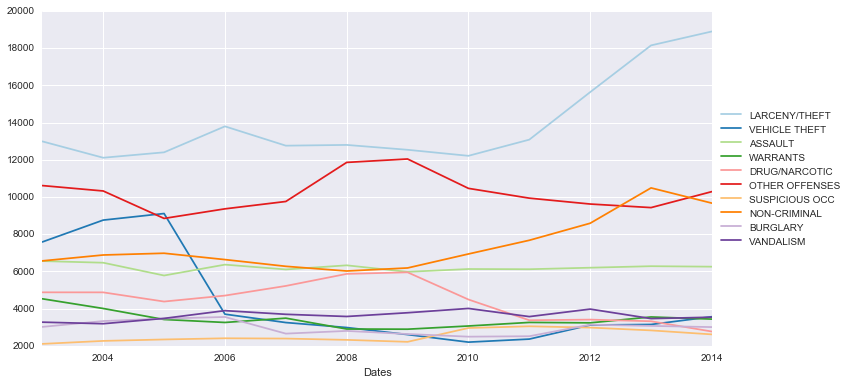

In [12]:
plt.figure(figsize=(12,6))
colors=[rgb2hex(color) for color in sns.color_palette("Paired", 10)]
for i,col in enumerate(train_ts2['Category'].unique()):
    train_ts2.resample('AS-JAN',how=sum)[col].plot(label=col,color=colors[i])
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

To get a clean look at each crime category, plot them individually. Larceny/theft and non-criminal increased signficantly since 2010, whereas vehicle theft and drug/narcotic decreased significantly since 2005. Assault is stable.

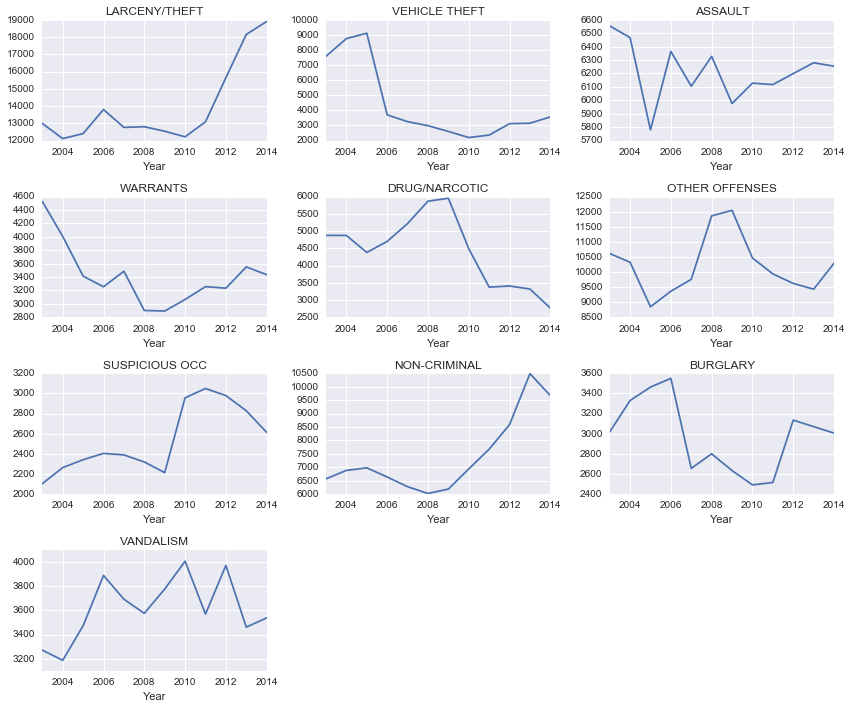

In [13]:
fig = plt.figure( figsize = (12,10))
for index,col in enumerate(train_ts2['Category'].unique()):
    ax = fig.add_subplot(4,3,index+1)
    train_ts2.resample('AS-JAN',how=sum)[col].plot(title=col,ax=ax)
    ax.set_xlabel('Year')

plt.tight_layout()

## Time-series analysis over month for seasonal patterns

Resample over month to look for seasonal patterns. First plot top 10 crimes together than plot them individually. Most crimes have two peaks in each year.

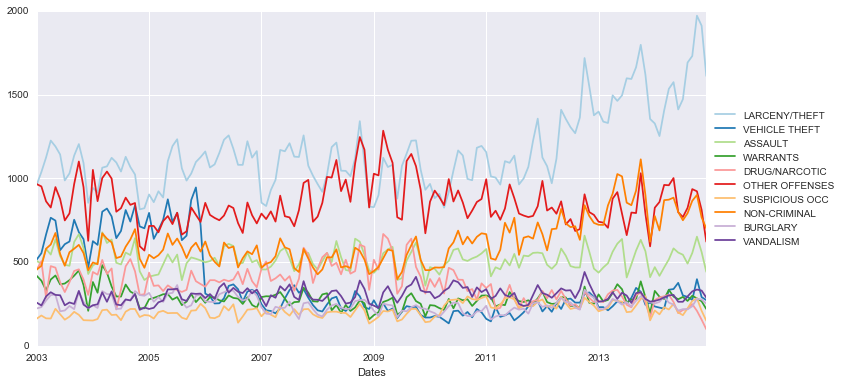

In [14]:
plt.figure(figsize=(12,6))
colors=[rgb2hex(color) for color in sns.color_palette("Paired", 10)]
for i,col in enumerate(train_ts2['Category'].unique()):
    train_ts2.resample('M',how=sum)[col].plot(label=col,color=colors[i])
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

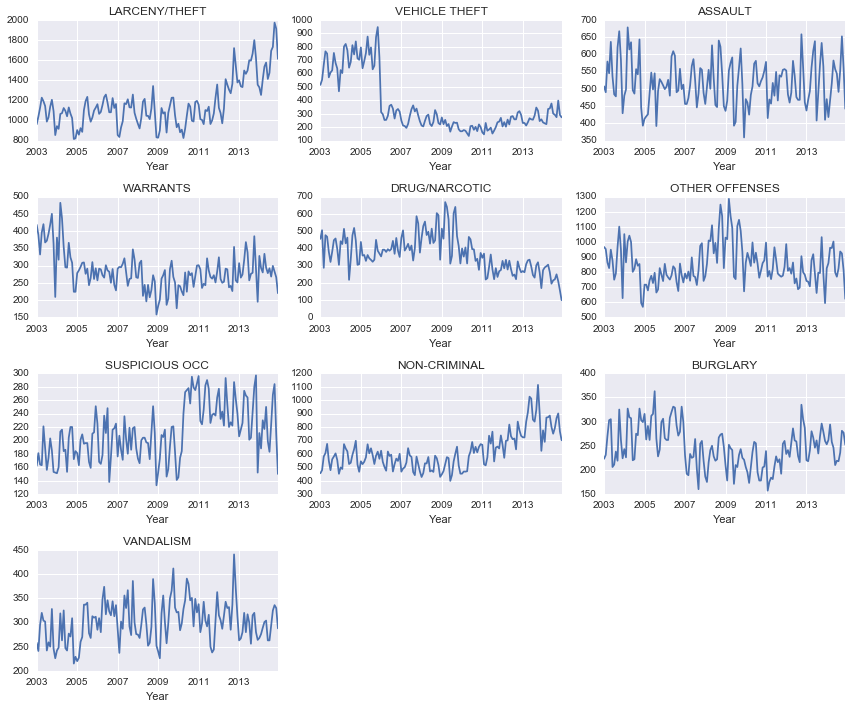

In [15]:
fig = plt.figure( figsize = (12,10))
for index,col in enumerate(train_ts2['Category'].unique()):
    ax = fig.add_subplot(4,3,index+1)
    train_ts2.resample('M',how=sum)[col].plot(title=col,ax=ax)
    ax.set_xlabel('Year')

plt.tight_layout()

## Aggregate crimes over each month

To get a better look at seasonal patterns, aggregate all crimes for each month. It is clear that October has the highest crime, followed by April, whereas February and December have the lowest crime numer.

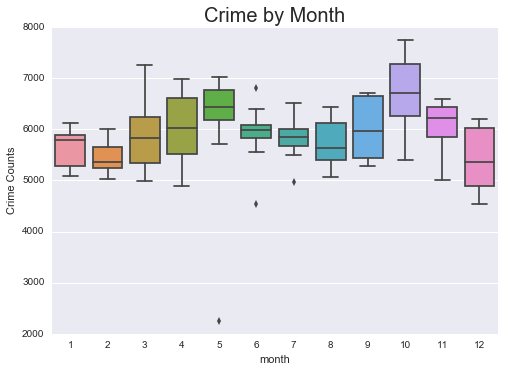

In [27]:
g1 = train.groupby(['month','year']).size().reset_index()
g1 = g1.rename(columns={0:'Crime Counts'})
sns.boxplot(x='month',y='Crime Counts',data=g1)
plt.title('Crime by Month',fontsize=20)

## Aggregate and normalize top 10 crimes over each month

Another way to look for seasonal pattern for each type of crime is to aggregate and normalize, to take account of different baseline numbers and plot over each month. As shown below, most top 10 crimes follow the same seasonable pattern as the overall crime, peaking in October and April, and reaching low points in December and Febuary.

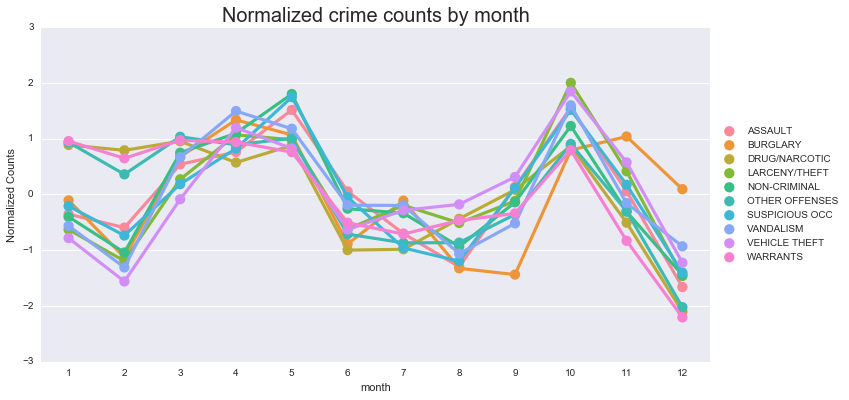

In [29]:
g1 = train_subset.groupby(['Category','month']).size().reset_index()
g1 = g1.rename(columns={0:'crime count'})
g2 = g1.groupby('Category')['crime count'] 
g1['normalized count'] = g2.apply(lambda x: (x - x.mean()) / x.std()) #add a column
plt.figure(figsize=(12,6))
sns.pointplot(x='month',y='normalized count',hue='Category',data=g1)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.ylabel('Normalized Counts')
plt.title('Normalized crime counts by month',fontsize=20)

# Do criminals work at night?

To find out patterns of crimes over 24 hours, aggregate all crimes and plot over 24 hours. Then for top 10 crimes, aggregate, normalize and plot over 24 hours. Most crimes follow the same pattern as the overall crime patterns. 2-6am has the lowest crime number. The number starts to increase in the morning and peaking at noon, then more or less stable till midnight. 

(0, 100)

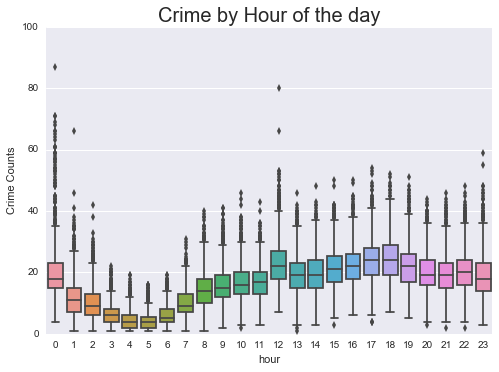

In [30]:
g3 = train.groupby(['hour','day','month','year']).size().reset_index()
sns.boxplot(x='hour',y=0,data=g3)
plt.ylabel('Crime Counts')
plt.title('Crime by Hour of the day',fontsize=20)
plt.ylim([0,100])

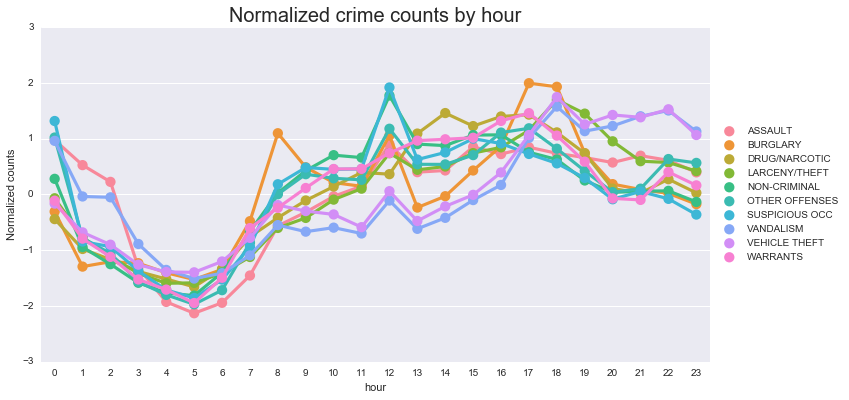

In [31]:
g1 = train_subset.groupby(['Category','hour']).size().reset_index()
g1 = g1.rename(columns={0:'crime count'})
g2 = g1.groupby('Category')['crime count'] 
g1['normalized count'] = g2.apply(lambda x: (x - x.mean()) / x.std()) #add a column
plt.figure(figsize=(12,6))
sns.pointplot(x='hour',y='normalized count',hue='Category',data=g1)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.ylabel('Normalized counts')
plt.title('Normalized crime counts by hour',fontsize=20)

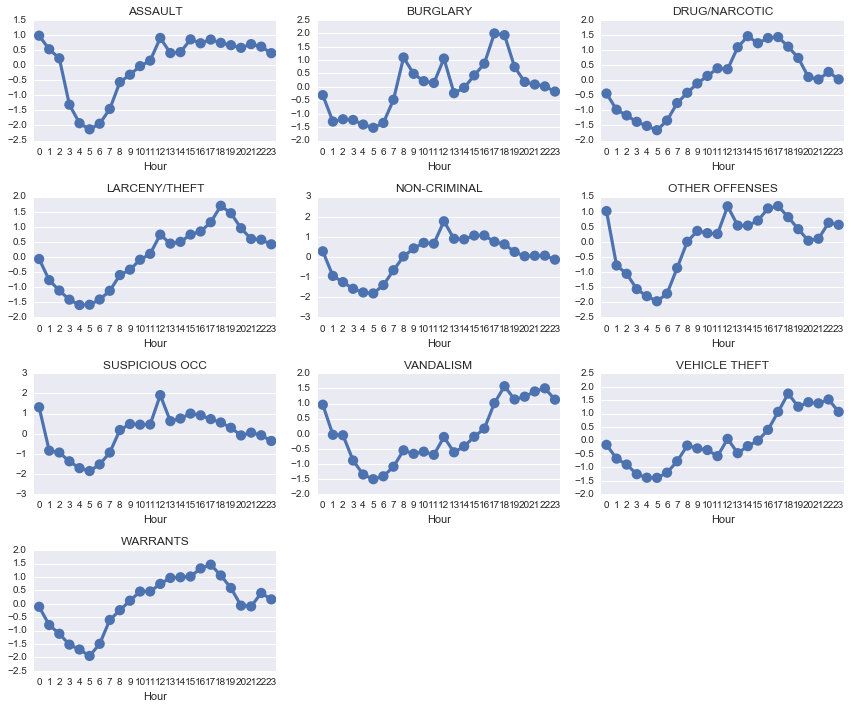

In [20]:
fig = plt.figure( figsize = (12,10))
for index,col in enumerate(g1['Category'].unique()):
    temp = g1[g1['Category']==col]
    ax = fig.add_subplot(4,3,index+1)
    sns.pointplot(x='hour',y='normalized count',data=temp,ax=ax)
    ax.set_xlabel('Hour')
    ax.set_ylabel('')
    ax.set_title(col)

plt.tight_layout()

# Do criminals work on weekends?

To find weekly pattern, aggregate all crimes and plot over day of week. Friday has the highest number and Sunday has the lowest number but the diffrence is small. For top 10 crimes, after aggregation and normalization, most crimes peak on Friday and decrease over the weekend, with the exception of assault. Assault peaks on Saturday and Sunday. Larceny/theft and vandalism peak on Friday and Saturday then decrease on Sunday. 

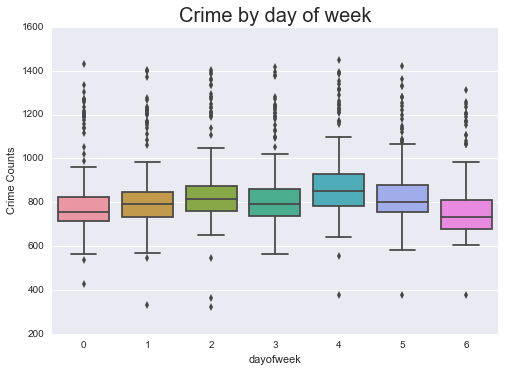

In [32]:
g2 = train.groupby(['dayofweek','month','year']).size().reset_index()
sns.boxplot(x='dayofweek',y=0,data=g2)
plt.ylabel('Crime Counts')
plt.title('Crime by day of week',fontsize=20)

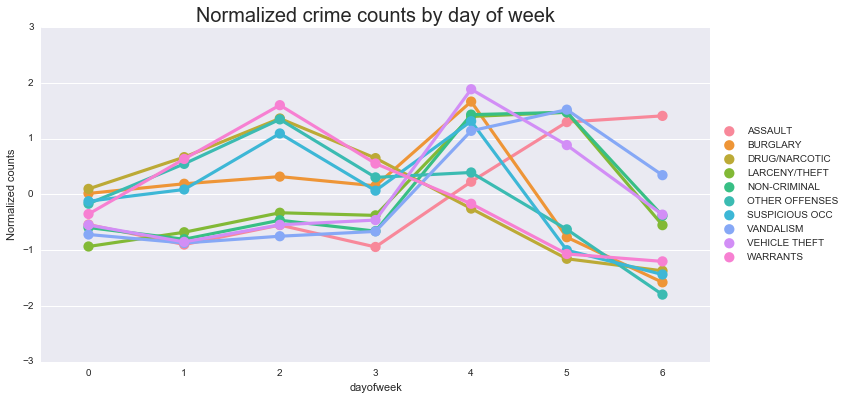

In [33]:
g1 = train_subset.groupby(['Category','dayofweek']).size().reset_index()
g1 = g1.rename(columns={0:'crime count'})
g2 = g1.groupby('Category')['crime count'] 
g1['normalized count'] = g2.apply(lambda x: (x - x.mean()) / x.std()) #add a column
plt.figure(figsize=(12,6))
sns.pointplot(x='dayofweek',y='normalized count',hue='Category',data=g1)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.ylabel('Normalized counts')
plt.title('Normalized crime counts by day of week',fontsize=20)

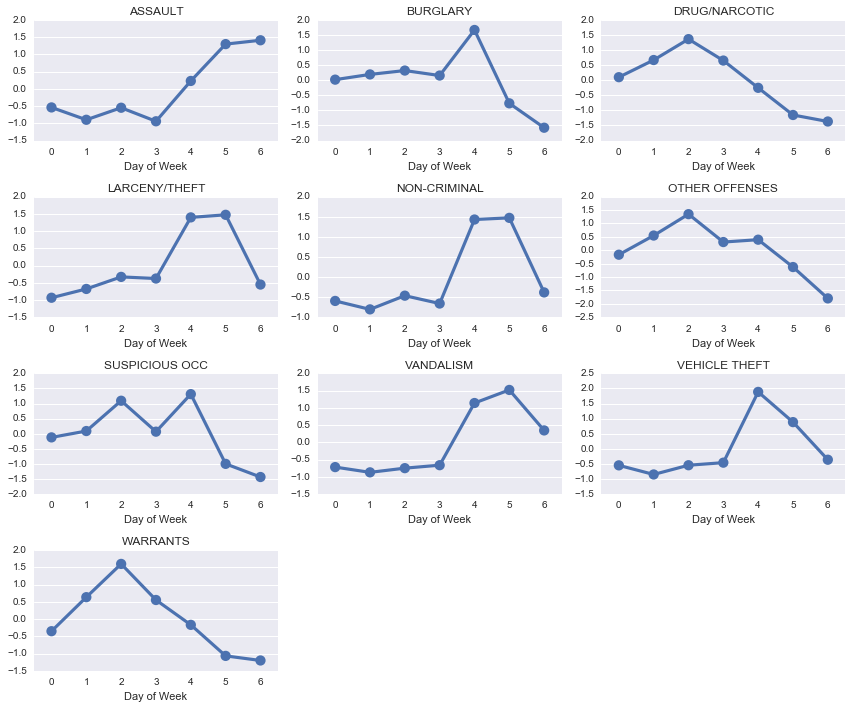

In [23]:
fig = plt.figure( figsize = (12,10))
for index,col in enumerate(g1['Category'].unique()):
    temp = g1[g1['Category']==col]
    ax = fig.add_subplot(4,3,index+1)
    sns.pointplot(x='dayofweek',y='normalized count',data=temp,ax=ax)
    ax.set_xlabel('Day of Week')
    ax.set_ylabel('')
    ax.set_title(col)

plt.tight_layout()